In [3]:
%pylab nbagg
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

sys.path.append(os.path.abspath("../src"))
from functions_figs import *

file_path = '../data/SEEG/df_correlations_5MOIs_ieeg.csv'

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Load dataset
df = pd.read_csv(file_path)


# Define a mapping from M_i to actual metric names
metric_names = {
    "M_13": "Salience",
    "M_14": "Peak Synchrony",
    "M_76": "Entrainment",
    "M_29": "Fluidity",
    "M_119": "Complexity"
}

# Apply the mapping to replace metric codes with names
df["Pre_Metric"] = df["Pre_Metric"].map(metric_names)
df["Post_Metric"] = df["Post_Metric"].map(metric_names)

ordered_metrics = ["Salience", "Peak Synchrony", "Entrainment", "Fluidity", "Complexity"]

# Ensure Pre_Metric and Post_Metric columns follow the desired order in the DataFrame
df["Pre_Metric"] = pd.Categorical(df["Pre_Metric"], categories=ordered_metrics, ordered=True)
df["Post_Metric"] = pd.Categorical(df["Post_Metric"], categories=ordered_metrics, ordered=True)


In [5]:
df

,Patient,Session,Radius,Pre_Metric,Post_Metric,Correlation,Significance,p-values,Network,ROI Name,ROI Label,Clustering Coefficient,Degree,Betweenness Centrality
0,P1,S1,5,Salience,Salience,0.482739,1,0.000000,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
1,P1,S1,5,Salience,Peak Synchrony,0.508068,1,0.000000,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
2,P1,S1,5,Salience,Fluidity,0.372420,1,0.019802,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
3,P1,S1,5,Salience,Entrainment,0.314634,1,0.049505,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
4,P1,S1,5,Salience,Complexity,-0.391557,-1,0.990099,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87445,P36,S11,100,Complexity,Salience,-0.503571,0,0.900990,Vis,7Networks_RH_Default_pCunPCC_2,199,0.001531,20504,0.000547
87446,P36,S11,100,Complexity,Peak Synchrony,-0.246429,0,0.792079,Vis,7Networks_RH_Default_pCunPCC_2,199,0.001531,20504,0.000547
87447,P36,S11,100,Complexity,Fluidity,-0.614286,-1,0.960396,Vis,7Networks_RH_Default_pCunPCC_2,199,0.001531,20504,0.000547
87448,P36,S11,100,Complexity,Entrainment,-0.042857,0,0.356436,Vis,7Networks_RH_Default_pCunPCC_2,199,0.001531,20504,0.000547


# Correlation Matrix -  Reduced Metrics

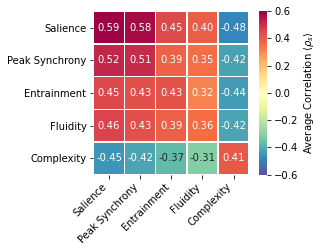

In [6]:
# Define the correct metric order
ordered_metrics = ["Salience", "Peak Synchrony", "Entrainment", "Fluidity", "Complexity"]

# Filter out non-significant correlations (p-value < 0.05 or p-value > 0.95)
df_filtered = df[(df["p-values"] < 0.05) | (df["p-values"] > 0.95)]

# Compute the mean correlation for each (Pre_Metric, Post_Metric) pair
rho_matrix = df_filtered.groupby(["Post_Metric", "Pre_Metric"])["Correlation"].mean().unstack()

# Reorder the rows and columns to follow the predefined metric order
rho_matrix = rho_matrix.loc[ordered_metrics, ordered_metrics]  # Explicitly reorder

# Ensure square figure shape
plt.figure(figsize=(4.5, 3.6))  # Adjust to make it square

# Plot the heatmap
ax = sns.heatmap(rho_matrix, annot=True, cmap="Spectral_r", fmt=".2f", linewidths=0.5, 
                 vmin=-0.6, vmax=0.6, cbar_kws={'label': r'Average Correlation $\langle \rho_s \rangle$'})  # Use raw string (r'')

# Set axis labels
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for readability
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig(path_out + 'EEG_corr_mat5x5.png', dpi=300)
plt.show()


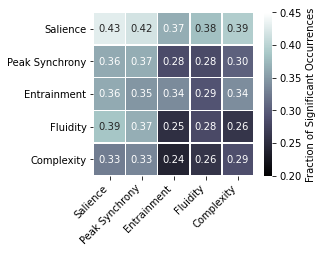

In [10]:
# Define the correct metric order
ordered_metrics = ["Salience", "Peak Synchrony", "Entrainment", "Fluidity", "Complexity"]

# Compute the fraction of significant occurrences for each (Pre_Metric, Post_Metric) pair
significance_counts = df.groupby(["Post_Metric", "Pre_Metric"])["Significance"].apply(lambda x: np.mean(x != 0)).unstack()

# Reorder rows and columns to follow the predefined metric order
significance_counts = significance_counts.loc[ordered_metrics, ordered_metrics]  # Force correct order

# Plot the heatmap
plt.figure(figsize=(4.5, 3.6))
sns.heatmap(significance_counts, annot=True, vmin=0.2, vmax=0.45, cmap="bone", fmt=".2f", linewidths=0.5, 
            cbar_kws={'label': 'Fraction of Significant Occurrences'})

# Set axis labels
plt.ylabel('')
plt.xlabel('')
#plt.ylabel("Post-Metric", fontsize=12)
#plt.xlabel("Pre-Metric", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for readability
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig(path_out+'EEG_frac_sign_mat5x5.png',dpi=300)
plt.show()

